In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests

In [2]:
#make a request 
r = requests.get("https://www.heisman.com/heisman-winners/")

In [3]:
# Retrieve contents
soup = BeautifulSoup(r.content)

In [4]:
# Print the html and understand structure
print(soup.body.prettify())

<body class="archive post-type-archive post-type-archive-heisman-winners">
 <header class="site-header affix" id="masthead" role="banner">
  <div class="container">
   <div class="row">
    <div class="site-header-inner site-logo-col col-xs-12 col-md-2">
     <a href="https://www.heisman.com/" rel="home" title="Heisman">
      <img alt="Rayser" height="111" src="https://www.heisman.com/wp-content/uploads/2018/05/heisman-logo-gray@2x.png?x36369" width="284"/>
     </a>
     <div class="site-branding">
      <p class="site-description lead">
       The most prestigious award in college football.
      </p>
     </div>
    </div>
    <div class="site-header-inner site-menu-col col-xs-12 col-md-10 col-lg-10">
     <nav class="site-navigation">
      <div class="row">
       <div class="site-navigation-inner col-sm-12">
        <div class="navbar navbar-default">
         <div class="navbar-header">
          <button class="navbar-toggle" data-target=".navbar-collapse" data-toggle="collapse

In [5]:
# Retrieve raw table data
raw_tdsets = soup.find(id='heisman_winner_table', class_='table_roster') 
raw_tdsets

<div class="table_roster" id="heisman_winner_table">
<article class="heisman-winner-article post-54 heisman-winners type-heisman-winners status-publish has-post-thumbnail hentry" data-class="Senior" data-name="Jay Berwanger" data-position="RB" data-school="Chicago" data-year="1935" id="post-54">
<div class="row">
<div class="hidden-xs hidden-sm col-md-1 img_col entry-content-thumbnail">
<a href="https://www.heisman.com/heisman-winners/jay-berwanger/" rel="bookmark"><img alt="" class="attachment-post-thumbnail size-post-thumbnail wp-post-image" height="280" src="https://www.heisman.com/wp-content/uploads/1935/04/35-JAY-BERWANGER.jpg?x36369" width="200"/></a>
</div>
<div class="col-xs-5 col-sm-4 col-md-4 name_col">
<h2 class="page-title"><a href="https://www.heisman.com/heisman-winners/jay-berwanger/" rel="bookmark">Jay Berwanger</a></h2>
</div>
<div class="col-xs-3 col-sm-1 col-md-1 year_col">
<a href="https://www.heisman.com/heisman-winners/jay-berwanger/" rel="bookmark">1935</a>
</div

In [6]:
# Repeat previous step, but focusing on necessary data only and append final set into a list

tr_data = raw_tdsets.find_all('div', {'class':'row'})
final_data = [i.get_text().strip().split('\n\n\n') for i in tr_data]
final_data


[['Jay Berwanger', '1935', 'Chicago', 'RB', 'Senior'],
 ['Larry Kelley', '1936', 'Yale', 'TE', 'Senior'],
 ['Clinton Frank', '1937', 'Yale', 'HB', 'Senior'],
 ['Davey O’Brien', '1938', 'TCU', 'QB', 'Senior'],
 ['Nile Kinnick', '1939', 'Iowa', 'RB', 'Senior'],
 ['Tom Harmon', '1940', 'Michigan', 'RB', 'Senior'],
 ['Bruce Smith', '1941', 'MInnesota', 'RB', 'Senior'],
 ['Frank Sinkwich', '1942', 'Georgia', 'RB', 'Senior'],
 ['Angelo Bertelli', '1943', 'Notre Dame', 'QB', 'Senior'],
 ['Les Horvath', '1944', 'Ohio State', 'HB', 'Senior'],
 ['Felix “Doc” Blanchard', '1945', 'Army', 'FB', 'Junior'],
 ['Glenn Davis', '1946', 'Army', 'RB', 'Senior'],
 ['John Lujack', '1947', 'Notre Dame', 'QB', 'Senior'],
 ['Doak Walker', '1948', 'SMU', 'RB', 'Junior'],
 ['Leon Hart', '1949', 'Notre Dame', 'TE', 'Senior'],
 ['Vic Janowicz', '1950', 'Ohio State', 'RB', 'Junior'],
 ['Dick Kazmaier', '1951', 'Princeton', 'RB', 'Senior'],
 ['Billy Vessels', '1952', 'Oklahoma', 'RB', 'Senior'],
 ['John Lattner', '19

In [7]:
# Extract columns headers - locate headers
table_headers = soup.find(class_="content-padder").find(class_='table_headings').find(class_='row')
table_headers

<div class="row">
<div class="hidden-xs hidden-sm col-md-1 img_col">
<p> </p>
</div>
<div class="col-xs-5 col-sm-4 col-md-4 name_col">
<p class="heisman-player-sort" data-sort="name">Player</p>
</div>
<div class="col-xs-3 col-sm-1 col-md-1 year_col">
<p class="heisman-player-sort sortdown" data-sort="year">Year</p>
</div>
<div class="col-xs-4 col-sm-4 col-md-3 school_col">
<p class="heisman-player-sort" data-sort="school">School</p>
</div>
<div class="col-xs-3 col-xs-offset-5 col-sm-1 col-sm-offset-0 col-md-1 pos_col">
<p class="heisman-player-sort" data-sort="position">Pos</p>
</div>
<div class="col-xs-4 col-sm-2 col-md-2 class_col">
<p class="heisman-player-sort" data-sort="class">Class</p>
</div>
</div>

In [8]:
# Extract columns headers - extract column names

headers = table_headers.find_all('div')
final_headers = [i.text.strip() for i in headers]
final_headers

['', 'Player', 'Year', 'School', 'Pos', 'Class']

In [9]:
# Create dataframe

df = pd.DataFrame(final_data, columns=final_headers[1:])
df

,Player,Year,School,Pos,Class
0,Jay Berwanger,1935,Chicago,RB,Senior
1,Larry Kelley,1936,Yale,TE,Senior
2,Clinton Frank,1937,Yale,HB,Senior
3,Davey O’Brien,1938,TCU,QB,Senior
4,Nile Kinnick,1939,Iowa,RB,Senior
...,...,...,...,...,...
79,Derrick Henry,2015,Alabama,RB,Junior
80,Lamar Jackson,2016,Louisville,QB,Sophomore
81,Baker Mayfield,2017,Oklahoma,QB,Senior*
82,Kyler Murray,2018,Oklahoma,QB,Junior*


In [10]:
# Convert 'Year' column from string to integer
df['Year'] = df['Year'].astype(int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 5 columns):
Player    84 non-null object
Year      84 non-null int64
School    84 non-null object
Pos       84 non-null object
Class     84 non-null object
dtypes: int64(1), object(4)
memory usage: 3.4+ KB


## Explore Heisman Winners dataset

In [12]:
df['Player'].value_counts()

Archie Griffin    2
Eric Crouch       1
Gary Beban        1
Cam Newton        1
Baker Mayfield    1
                 ..
Mark Ingram       1
Gino Torretta     1
Barry Sanders     1
Derrick Henry     1
Bruce Smith       1
Name: Player, Length: 83, dtype: int64

In [13]:
df[df['Player'] == 'Archie Griffin']

,Player,Year,School,Pos,Class
39,Archie Griffin,1974,Ohio State,RB,Junior
40,Archie Griffin,1975,Ohio State,RB,Senior


##### Archie Griffin appears to be the only player to have won this award twice (1974 & 1975) since its introduction in 1935. 

In [21]:
df['Pos'].value_counts(normalize=True)

RB    0.464286
QB    0.416667
WR    0.035714
HB    0.023810
FB    0.023810
TE    0.023810
CB    0.011905
Name: Pos, dtype: float64

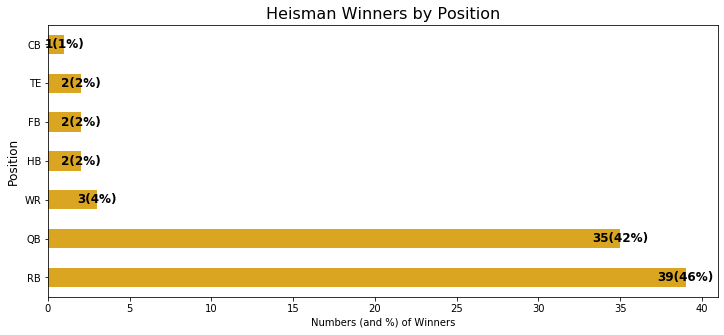

In [20]:
# Let's see how many heisman winners there are in each field position
pos = df['Pos'].value_counts()
plt.figure(figsize=(12,5))
pos.plot(kind='barh',color='goldenrod')
plt.xlabel('Numbers (and %) of Winners')
plt.ylabel('Position', fontsize=12)
plt.title('Heisman Winners by Position', fontsize=16)
for a,b in zip(range(len(pos.index)), pos.values): 
    plt.text(b, a, str(b) + '(' + str(round(b/len(df)*100)) +'%)' 
            ,fontsize=12
            ,weight='bold'
            ,va='center'
            ,ha='center'
            ,color='black'
            )

##### RB and QB positions have produced far more winners than any other position, with RB claiming over half of overall winners (when combined RB, FB and HB)

In [22]:
df['Pos_new'] = np.where(df['Pos'].isin(['RB','HB','FB']),'RB',df['Pos'])
df

,Player,Year,School,Pos,Class,Pos_new
0,Jay Berwanger,1935,Chicago,RB,Senior,RB
1,Larry Kelley,1936,Yale,TE,Senior,TE
2,Clinton Frank,1937,Yale,HB,Senior,RB
3,Davey O’Brien,1938,TCU,QB,Senior,QB
4,Nile Kinnick,1939,Iowa,RB,Senior,RB
...,...,...,...,...,...,...
79,Derrick Henry,2015,Alabama,RB,Junior,RB
80,Lamar Jackson,2016,Louisville,QB,Sophomore,QB
81,Baker Mayfield,2017,Oklahoma,QB,Senior*,QB
82,Kyler Murray,2018,Oklahoma,QB,Junior*,QB


In [24]:
df[df['Pos'] == 'CB']

,Player,Year,School,Pos,Class,Pos_new
62,Charles Woodson,1997,Michigan,CB,Junior,CB


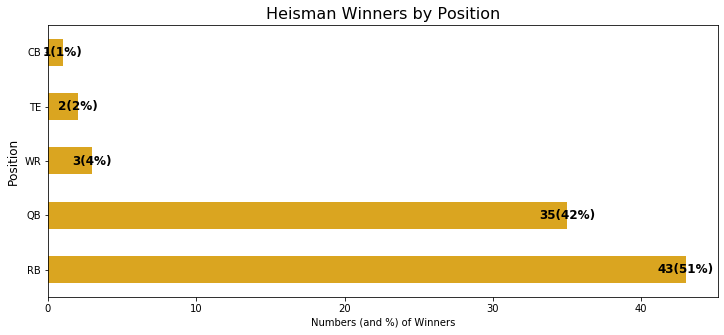

In [26]:
#Let's group different backs position under running back (RB), then plot the chart again
df['Pos_new'] = np.where(df['Pos'].isin(['RB','HB','FB']),'RB',df['Pos'])

pos = df['Pos_new'].value_counts()
plt.figure(figsize=(12,5))
pos.plot(kind='barh',color='goldenrod')
plt.xlabel('Numbers (and %) of Winners')
plt.ylabel('Position', fontsize=12)
plt.title('Heisman Winners by Position', fontsize=16)
for a,b in zip(range(len(pos.index)), pos.values): 
    plt.text(b, a, str(b) + '(' + str(round(b/len(df)*100)) +'%)' 
            ,fontsize=12
            ,weight='bold'
            ,va='center'
            ,ha='center'
            ,color='black'
            )

###### Charles Woodson is the only defensive player to have won the Heisman trophy back in 1997.

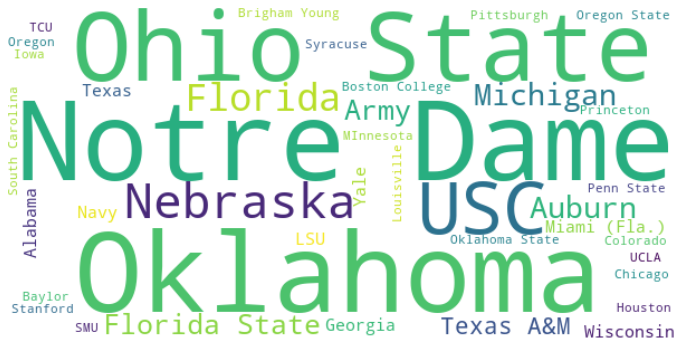

In [27]:
# Let's see organisations with the most heisman winners
from wordcloud import WordCloud

#Generate word cloud to visualise most influential schools in relation to this prestigious award. 
wc = WordCloud(width=600, height=300, max_words=500, background_color='white').generate_from_frequencies(df['School'].value_counts())

plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

##### Colleges (universities) that stand out from the plot above are Oklahoma, Notre Dame, Ohio State and USC. I was surprised not to find out Alabama wasn't amongst the leading programs.

In [28]:
print((df['School'].value_counts()))

Notre Dame        7
Oklahoma          7
Ohio State        7
USC               6
Nebraska          3
Florida           3
Michigan          3
Auburn            3
Florida State     3
Army              3
Texas A&M         2
Miami (Fla.)      2
Texas             2
Navy              2
Georgia           2
Yale              2
Alabama           2
Wisconsin         2
LSU               2
Brigham Young     1
Colorado          1
SMU               1
Oregon State      1
Oklahoma State    1
MInnesota         1
Chicago           1
Princeton         1
Oregon            1
Boston College    1
UCLA              1
Syracuse          1
Louisville        1
Houston           1
Penn State        1
Baylor            1
TCU               1
Pittsburgh        1
Iowa              1
Stanford          1
South Carolina    1
Name: School, dtype: int64


In [29]:
df['Class'] = [x.replace('*','') for x in df['Class']]
df['Class'].value_counts()

Senior       59
Junior       19
Sophomore     4
Freshman      2
Name: Class, dtype: int64

In [30]:
df[df['Class'].isin (['Freshman','Sophomore'])]

,Player,Year,School,Pos,Class,Pos_new
71,Tim Tebow,2007,Florida,QB,Sophomore,QB
72,Sam Bradford,2008,Oklahoma,QB,Sophomore,QB
73,Mark Ingram,2009,Alabama,RB,Sophomore,RB
76,Johnny Manziel,2012,Texas A&M,QB,Freshman,QB
77,Jameis Winston,2013,Florida State,QB,Freshman,QB
80,Lamar Jackson,2016,Louisville,QB,Sophomore,QB


###### As expected, the majority of players (just over 90%) have won the award in their Junior or Senior year of school.
###### Just a handful of players have won this trophy 🏆 in their early years of college (as Freshman or Sophomore), with 5 out of 6 winners being Quaterbacks and the other winner being a running back (these 6 fastest winners are listed above).


In [31]:
df['Class'].value_counts(normalize=True)

Senior       0.702381
Junior       0.226190
Sophomore    0.047619
Freshman     0.023810
Name: Class, dtype: float64

In [32]:
import seaborn as sns

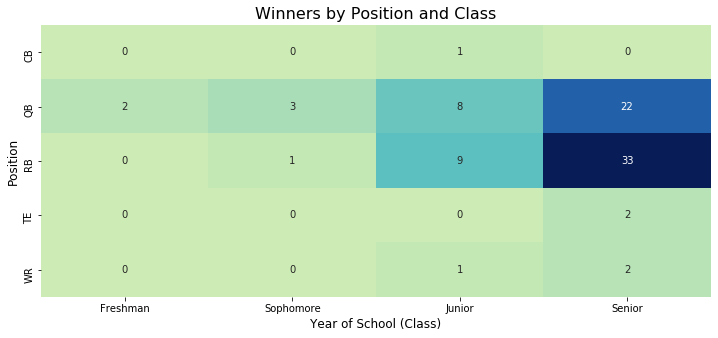

In [36]:
# Let's plot winners by Position and Class
xtab = pd.crosstab(df.Pos_new,df.Class)
xtab = xtab[['Freshman','Sophomore','Junior','Senior']]

plt.figure(figsize=(12,5))
sns.heatmap(xtab,cmap='YlGnBu', annot=True, cbar=False, vmin=-10)
plt.title('Winners by Position and Class', fontsize=16)
plt.xlabel('Year of School (Class)', fontsize=12)
plt.ylabel('Position', fontsize=12)
plt.show()